In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 20000
text_max_words = 200

Using TensorFlow backend.


### 데이터셋 생성하기
훈련셋과 시험셋 불러오기

In [2]:
import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

np.load = np_load_old

훈련셋과 검증셋 분리

In [3]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

데이터셋 전처리 : 문장 길이 맞추기

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

### 모델 구성하기
임베딩(Embedding) 레이어의 인자 의미

- 첫번째 인자(input_dim) : 단어 사전의 크기를 말하며 총 20,000개의 단어 종류가 있다는 의미이다. 이 값은 앞서 imdb.load_data() 함수의 num_words 인자값과 동일해야 한다.

- 두번째 인자(output_dim) : 단어를 인코딩 한 후 나오는 벡터 크기이다. 이 값이 128이라면 단어를 128차원의 의미론적 기하공간에 나타낸다는 의미이다. 단순하게 빈도수만으로 단어를 표시한다면, 10과 11은 빈도수는 비슷하지만 단어로 볼 때는 전혀 다른 의미를 가지고 있다. 하지만 의미론적 기하공간에서는 거리가 가까운 두 단어는 의미도 유사하다. 즉 임베딩 레이어는 입력되는 단어를 의미론적으로 잘 설계된 공간에 위치시켜 벡터로 수치화 시킨다고 볼 수 있다.

- input_length : 단어의 수 즉 문장의 길이를 나타낸다. 임베딩 레이어의 출력 크기는 샘플 수 * output_dim * input_lenth가 된다. 임베딩 레이어 다음에 Flatten 레이어가 온다면 반드시 input_lenth를 지정해야 한다. 플래튼 레이어인 경우 입력 크기가 알아야 이를 1차원으로 만들어서 Dense 레이어에 전달할 수 있기 때문이다.

In [5]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### 모델 학습과정 설정하기

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습시키기

In [7]:
hist = model.fit(x_train,
                 y_train,
                 epochs=25,
                 batch_size=64,
                 validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 36s 2ms/step - loss: 0.4156 - acc: 0.7903 - val_loss: 0.3023 - val_acc: 0.8734
Epoch 2/25
20000/20000 [==============================] - 36s 2ms/step - loss: 0.0508 - acc: 0.9834 - val_loss: 0.4111 - val_acc: 0.8616
Epoch 3/25
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0032 - acc: 0.9996 - val_loss: 0.5216 - val_acc: 0.8676
Epoch 4/25
20000/20000 [==============================] - 43s 2ms/step - loss: 2.3715e-04 - acc: 1.0000 - val_loss: 0.5464 - val_acc: 0.8688
Epoch 5/25
20000/20000 [==============================] - 43s 2ms/step - loss: 9.2801e-05 - acc: 1.0000 - val_loss: 0.5650 - val_acc: 0.8696
Epoch 6/25
20000/20000 [==============================] - 51s 3ms/step - loss: 5.8713e-05 - acc: 1.0000 - val_loss: 0.5778 - val_acc: 0.8704
Epoch 7/25
20000/20000 [==============================] - 42s 2ms/ste

### 학습과정 확인

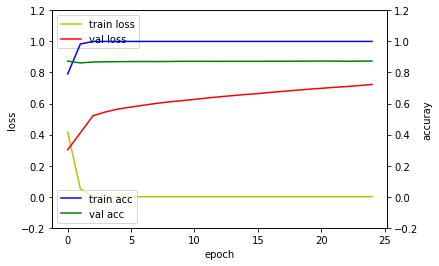

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가

In [9]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 6s 256us/step
## evaluation loss and_metrics ##
[0.764113080329895, 0.8618000000190735]
